In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [2]:
data=pd.read_excel(r'PS.xlsx')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
colname=[]
for x in data.columns:
    if data[x].dtypes=='object':
        colname.append(x)
colname     

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [7]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature job
mapping {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Feature marital
mapping {'divorced': 0, 'married': 1, 'single': 2}
Feature education
mapping {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
Feature default
mapping {'no': 0, 'yes': 1}
Feature housing
mapping {'no': 0, 'yes': 1}
Feature loan
mapping {'no': 0, 'yes': 1}
Feature contact
mapping {'cellular': 0, 'telephone': 1, 'unknown': 2}
Feature month
mapping {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
Feature poutcome
mapping {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}
Feature y
mapping {'no': 0, 'yes': 1}


In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


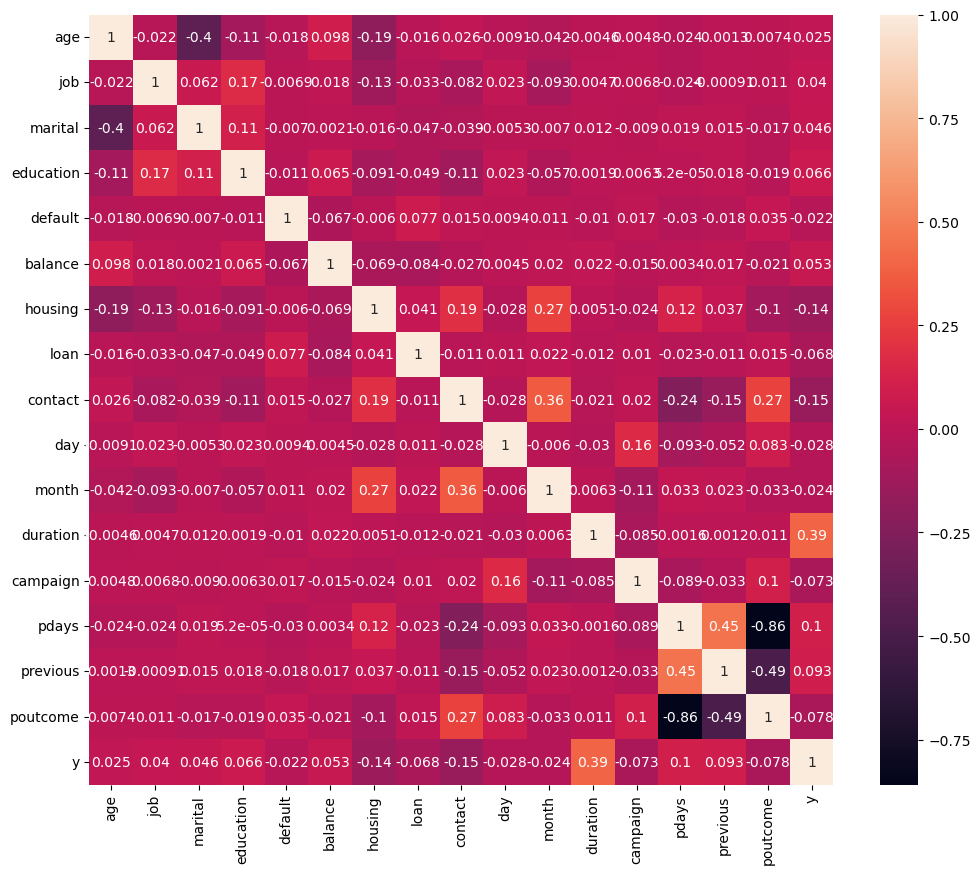

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()


In [10]:
cor_target = abs(cor["y"])
relevant_features = cor_target[cor_target>0.00]
relevant_features

age          0.025155
job          0.040438
marital      0.045588
education    0.066241
default      0.022419
balance      0.052838
housing      0.139173
loan         0.068185
contact      0.148395
day          0.028348
month        0.024471
duration     0.394521
campaign     0.073172
pdays        0.103621
previous     0.093236
poutcome     0.077840
y            1.000000
Name: y, dtype: float64

In [11]:
X = data.values[:,0:-1]
Y = data.values[:,-1]

In [12]:
X.shape

(45211, 16)

In [13]:
Y.shape

(45211,)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [15]:
X

array([[ 1.60696496, -0.10381968, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [ 0.28852927,  1.42400783,  1.3683719 , ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.74738448, -0.71495069, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       ...,
       [ 2.92540065,  0.20174582, -0.27576178, ...,  1.43618859,
         1.05047333, -0.56617504],
       [ 1.51279098, -1.02051619, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.37068857, -0.71495069, -0.27576178, ...,  1.4761376 ,
         4.52357654, -1.57724822]])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [26]:
X.shape

(45211, 16)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(31647, 16)
(31647,)
(13564, 16)
(13564,)


In [32]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X,Y)

LogisticRegression()

In [34]:
Y_pred=classifier.predict(X)
print(Y_pred)
print(list(zip(Y,Y_pred)))

[0 0 0 ... 1 0 1]
[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y,Y_pred))

acc=accuracy_score(Y,Y_pred)
print("Accuracy of the model: ",acc)

[[39137   785]
 [ 4145  1144]]
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211

Accuracy of the model:  0.8909557408595253


In [21]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [22]:
11761+350

12111

In [23]:
12111/13564

0.8928782070185786

In [37]:
classifier.predict_proba(X)[:,1]


array([0.03390682, 0.02047124, 0.00523325, ..., 0.92708325, 0.20246966,
       0.51108633])

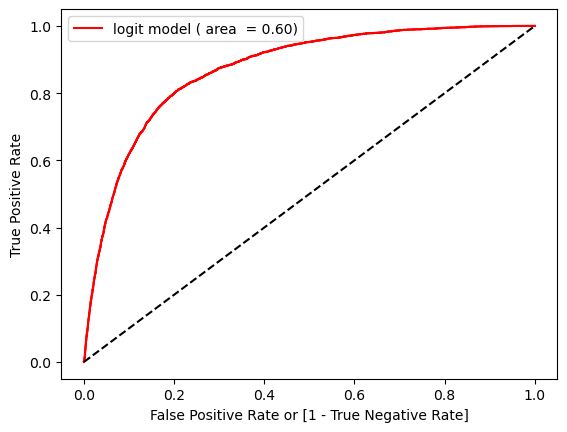

In [40]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc = roc_auc_score(Y,Y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()